# Linear Regression
---

- We introduce **Linear Regression** - a type of **Supervised ML**, which aims to predict **real-valued output**
- We introduce the **Ordinary Least Squares** algorithm, how it works, and how to apply and interpret it in the context of a real-life scenario
- We  introduce the main **Performance Evaluation Metrics for Regression** - **Coefficient of Determination, Mean Squared Error (MSE) and Mean Absolute Error (MAE)**

---
## A Simple Example:

- Suppose you have access to a collection of GDP and Life Satisfaction scores on a country level
- The dataset is available in the `gpd_vs_happiness.csv` file in the `data` folder
- We want to explore the relationship between GDP and Life Satisfaction, and build a **predictive model**, which can infer the Life Satisfaction of a country from its GDP:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
filepath = r'./Data/gdp_vs_happiness.csv'
df = pd.read_csv(filepath)
df.head()

,Entity,Code,Year,GDPPC,Life Satisfaction
0,Afghanistan,AFG,2016,1739.583177,4.220169
1,Albania,ALB,2016,11424.628320,4.511101
2,Algeria,DZA,2016,13974.666220,5.388171
3,Argentina,ARG,2016,18479.442210,6.427221
4,Armenia,ARM,2016,8174.366732,4.325472


---
### Data Exploration:

Explore the data to **gain domain knowledge**:
- check the dimensions of the dataset
- check for missing data
- check the distributions of GDP and Life Satisfaction
- visualise the distribution of countries via a scatter plot:

(132, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             132 non-null    object 
 1   Code               132 non-null    object 
 2   Year               132 non-null    int64  
 3   GDPPC              132 non-null    float64
 4   Life Satisfaction  132 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.3+ KB


None

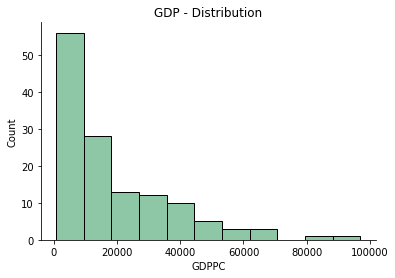

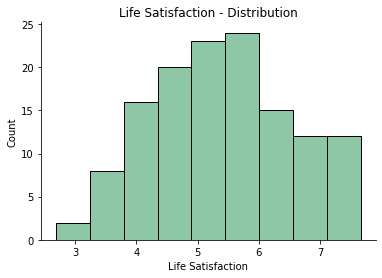

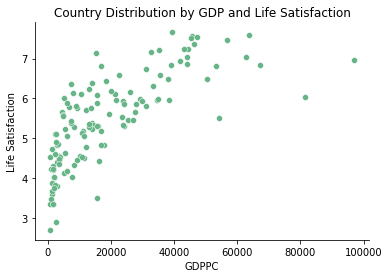

In [4]:
# Check the dimensions of the dataset
display(df.shape)

# Check for missing data
display(df.info())

# Visualise the Distribution of GDP via a Histogram
g = sns.histplot(x= 'GDPPC', data = df, color = '#67B587')
g.set_title('GDP - Distribution')
sns.despine()
plt.show()

# Visualise the Distribution of Life Satisfaction via a Histogram
g = sns.histplot(x= 'Life Satisfaction', data = df, color = '#67B587')
g.set_title('Life Satisfaction - Distribution')
sns.despine()
plt.show()

# Visualise the distribution of countries as a Scatter Plot
g = sns.scatterplot(x= 'GDPPC', y = 'Life Satisfaction', data = df, color = '#67B587')
g.set_title('Country Distribution by GDP and Life Satisfaction')
sns.despine()
plt.show()

---
### Visualising the Line of Best Fit:

- `seaborn` allows to quickly plot a **Regression Plot** - a composite visualisation, consisting of a **scatterplot** and a **line of best fit** to the scatterplot
- This line helps to visualise the **relationship** between two variables - an independent variable and a response/target variable:

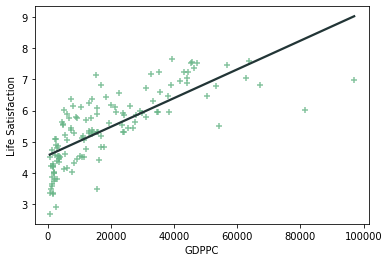

In [5]:
sns.regplot(x = 'GDPPC', y = 'Life Satisfaction', marker = '+', ci = None, data = df,
            scatter_kws={'color':'#67B587' }, line_kws = {'color':'#223536'})
plt.show()

---
## Linear Regression (Theory + Method):

---
### Simple Linear Regression (OLS):

A **Simple Linear Regression with OLS** is an approach of predicting a real-valued outcome **y**, based on a single input **x**:
- It provides the **Line of Best Fit** with the most optimal coefficients and y-intercept for the given set of training data points, such that the **Sum of Squared Differences** between the predicted outputs (the points on the line) and the actual outputs is the **lowest possible value**.
- Mathematically, given a single input **x**, we can produce a prediction **$\hat{y}$** for the output via the **linear expression**:
$$
\hat{y} = \beta_{0} + \beta_{1}x
$$


<center>
    <div>
        <img src="./Images/Simple_Linear_Regression.JPG"/>
    </div>
</center>

---
### Simple Linear Regression in Python:
- Simple Linear Regression on the GDP - Life Satisfaction case:
- Following the **Fit-Predict Workflow** stage-by-stage:
    - First, split the data into train and test with `train_test_split()`
    - Next, create an instance of a `LinearRegression` model from from `sklearn.linear_model`
    - Fit the model to the training data with the `fit()` method - by fitting the model to the data, it **learns the optimal coefficients in the above linear equation**
    - Next, make predictions to the test data with the `predict()` method
    - Lastly, evaluate the model performance on the test dataset via the `mean_squared_error()` function from `sklearn.metrics`

In [6]:
# First, split the dataset into X and y - features vs label
# ensure that X is a DataFrame
# ensure that y is a Series

X = df[['GDPPC']]
y = df['Life Satisfaction']

# Next, split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

# Check the shape of all 4 objects:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 1)
(27, 1)
(105,)
(27,)


In [7]:
# Initialise an instance of a Linear Regression Model
model = LinearRegression()

# Fit the model to X_train and y_train
model.fit(X_train, y_train)

LinearRegression()

- The process of **"fitting" an ML model to a dataset** results in the model **learning the optimal values for its parameters**.
- In the case of working with Linear Regression and OLS, the model parameters are the coefficients of the linear expression - **$\beta_{0}$** and **$\beta_{1}$**
- Once we apply the `fit()` method to the `model`, we can retrieve the optimal values for the coefficients via the:
    - `coef_` attribute
    - `intercept_` attribute

In [8]:
# Retrieve optimal value for the intercept coefficient
print(f'The intercept coefficient is: {model.intercept_}')

# Retrieve optimal value for the slope coefficient
print(f'The slope coefficient is: {model.coef_}')

The intercept coefficient is: 4.633655866609084
The slope coefficient is: [4.39351336e-05]


- Once the model is fitted, we proceed with **testing and evaluation**
- To evaluate the model performance, we can use **Mean Squared Error (MSE)**, which is a commonly used **Regression Performance Metric**, amongst others such as the **RMSE** and **MAE**
- We often report the **Square Root of the MSE** or **RMSE** so that the metric is measured on the *same* scale as the target output

In [9]:
# With the trained model, make predictions on X_test - store in y_pred
y_pred = model.predict(X_test)

# Compare y_test and y_pred via MSE and RMSE
mse = mean_squared_error(y_test, y_pred)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')

MSE (test): 0.4293
RMSE (test): 0.6552


- We can plot a **scatterplot** of the test data and overlay the **Linear Regression Line** on top:

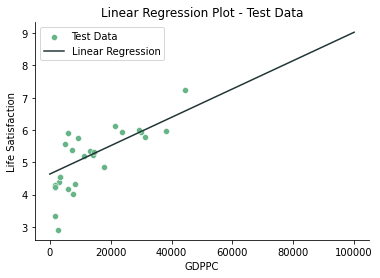

In [10]:
test_df = X_test.copy()
test_df['Life Satisfaction'] = y_test

x_axis = np.linspace(0, 100000)
y_axis = model.intercept_ + model.coef_*x_axis

fig, ax = plt.subplots()

g = sns.scatterplot(x = 'GDPPC', y = 'Life Satisfaction', data = test_df, ax = ax, label = 'Test Data', color = '#67B587' )
g = sns.lineplot(x = x_axis,y = y_axis, ax = ax, label = 'Linear Regression', color = '#223536')
g.set_title('Linear Regression Plot - Test Data')
sns.despine()
plt.show()

---
## Regression Model Evaluation - Metrics:
There are 3 main **performance evaluation metrics** that can be used on **Regression Models**:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Coefficient of Determination (R-Squared)**

---
### MAE - Mean Absolute Error:

#**MAE** is the mean of absolute values of the errors for all samples. An **error** is simply the <font color=#14F278>**difference between true and predicted value**</font>. **MAE** thus obtains non-negative values - the lower the MAE score, the better the prediction:

$$
MAE=\frac{1}{N}\sum_{i=1}^{N}|y_{i}-\hat{y_{i}}|
$$
- $N$ is the number of samples
- $y_{i}$ is the actual (true) value for the $i^{th}$ sample
- $\hat{y_{i}}$ is the predicted value for the $i^{th}$ sample

In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error is {mae:.4f}")

Mean absolute error is 0.5037


---
### Mean Squared Error:

**MSE** is the mean of squared errors for all samples. **MSE** obtains non-negative values - the lower the MSE score, the better the prediction:

$$
MSE=\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^2
$$
- $N$ is the number of samples
- $y_{i}$ is the actual (true) value for the $i^{th}$ sample
- $\hat{y_{i}}$ is the predicted value for the $i^{th}$ sample

Often times, we take the **square root of MSE** (known as **Root Mean Squared Error - RMSE**)

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error is {mse:.4f}")
print(f"Root mean squared error is {mse**0.5:.4f}")

Mean squared error is 0.4293
Root mean squared error is 0.6552


---
### R-Squared - Coefficient of Determination:

#**R-Squared** measures how well your model performs compared to a constant model, predicting the average value. It is calculated according to this formula:

$$
R^2(y_{i},\hat{y_{i}})=1-\frac{\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^2}{\sum_{i=1}^{N}(y_{i}-\bar{y})^2}
$$
- the numerator of the ratio on the RHS is the **Residual Sum of Squares (RSS)**
- the denominator of the ratio is the **Total Sum of Squares (TSS)**

- RSS corresponds to the squared error of the residuals when predicted by our regression model
- TSS corresponds to the squared error of the residuals when predicted by a constant model


The <font color=#14F278>**best possible R-Squared value is 1**</font>, when the **RSS** drops to 0. Note that **R-squared** can be negative for models which are a bad fit for the given data

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared is {r2:.4f}")

R-squared is 0.5253
